# Create dummy variable using pd.get_dummies()

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category.



Numeric variables can also be dummy coded to explore nonlinear effects. Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables and In pandas, I can turn a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.

* For example, assume some Feature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C. such as below:

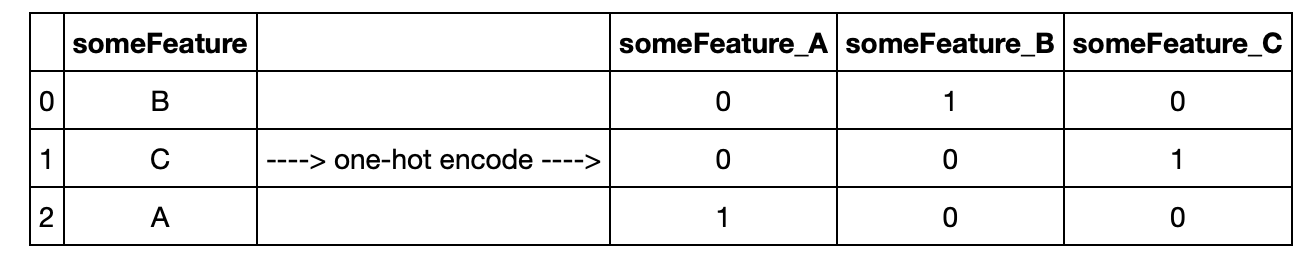

In [21]:
from IPython.display import Image
Image(filename = 'one_hot.png', width=700)

## With sample dataset

In [1]:
import pandas as pd

# import data
df = pd.read_csv('salary.csv')
df.drop(columns=['Unnamed: 0'], inplace= True)
df.head()

,Gender,Rank,Year_rank,Degree,Years_earning,Salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [2]:
df.shape

(52, 6)

 * Year_rank : year in current rank
 
 
 * Years_earning : years since earning highest degree

In [3]:
# Check out Gencder var
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [4]:
# Turn gender column into a dummy var
dummy = pd.get_dummies(df.Gender)
dummy.head()

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [5]:
# Concatenate dummy var into df
df = pd.concat([df, dummy], axis=1)
df.head()

,Gender,Rank,Year_rank,Degree,Years_earning,Salary,female,male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1


In [6]:
# or merge these dataframe
merge = df.merge(dummy, left_index=True, right_index=True)
merge.head()

,Gender,Rank,Year_rank,Degree,Years_earning,Salary,female_x,male_x,female_y,male_y
0,male,full,25,doctorate,35,36350,0,1,0,1
1,male,full,13,doctorate,22,35350,0,1,0,1
2,male,full,10,doctorate,23,28200,0,1,0,1
3,female,full,7,doctorate,27,26775,1,0,1,0
4,male,full,19,masters,30,33696,0,1,0,1


In [7]:
df.Rank.unique()

array(['full', 'associate', 'assistant'], dtype=object)

In [8]:
# One-hot encode Rank var
rank_dummy = pd.get_dummies(df.Rank)
rank_dummy.head()

,assistant,associate,full
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
df = pd.concat([df, rank_dummy], axis=1)
df.head()

,Gender,Rank,Year_rank,Degree,Years_earning,Salary,female,male,assistant,associate,full
0,male,full,25,doctorate,35,36350,0,1,0,0,1
1,male,full,13,doctorate,22,35350,0,1,0,0,1
2,male,full,10,doctorate,23,28200,0,1,0,0,1
3,female,full,7,doctorate,27,26775,1,0,0,0,1
4,male,full,19,masters,30,33696,0,1,0,0,1


In [12]:
# Encode Degree to numerical values

print(df.Degree.unique())

degree_dum = df.Degree.apply(lambda x: 0 if x == 'masters' else 1)
degree_dum.head()

['doctorate' 'masters']


0    1
1    1
2    1
3    1
4    0
Name: Degree, dtype: int64

In [13]:
# Print the number of  degree_num var
print(len(list(degree_dum)))

52


In [14]:
df = pd.concat([df, degree_dum], axis=1)
df.head()

,Gender,Rank,Year_rank,Degree,Years_earning,Salary,female,male,assistant,associate,full,Degree
0,male,full,25,doctorate,35,36350,0,1,0,0,1,1
1,male,full,13,doctorate,22,35350,0,1,0,0,1,1
2,male,full,10,doctorate,23,28200,0,1,0,0,1,1
3,female,full,7,doctorate,27,26775,1,0,0,0,1,1
4,male,full,19,masters,30,33696,0,1,0,0,1,0
